In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [89]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc

In [110]:
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
## Reading the dataset
colnames = ['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm','class']
df = pd.read_csv('iris.data',names=colnames)

## Printing random 10 rows of dataset
df.sample(n=10)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
101,5.8,2.7,5.1,1.9,Iris-virginica
75,6.6,3.0,4.4,1.4,Iris-versicolor
71,6.1,2.8,4.0,1.3,Iris-versicolor
119,6.0,2.2,5.0,1.5,Iris-virginica
30,4.8,3.1,1.6,0.2,Iris-setosa
44,5.1,3.8,1.9,0.4,Iris-setosa
45,4.8,3.0,1.4,0.3,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa
80,5.5,2.4,3.8,1.1,Iris-versicolor


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

**There are no missing values**

In [27]:
df.shape

(150, 5)

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [57]:
df['class'] = pd.factorize(df['class'])[0]
df.sample(8)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
46,5.1,3.8,1.6,0.2,0
94,5.6,2.7,4.2,1.3,1
137,6.4,3.1,5.5,1.8,2
62,6.0,2.2,4.0,1.0,1
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
43,5.0,3.5,1.6,0.6,0
37,4.9,3.1,1.5,0.1,0


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [58]:
df.corr()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
sepal length in cm,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width in cm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length in cm,0.871754,-0.420516,1.000000,0.962757,0.949043
petal width in cm,0.817954,-0.356544,0.962757,1.000000,0.956464
class,0.782561,-0.419446,0.949043,0.956464,1.000000


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [59]:
df.var()

sepal length in cm    0.685694
sepal width in cm     0.188004
petal length in cm    3.113179
petal width in cm     0.582414
class                 0.671141
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

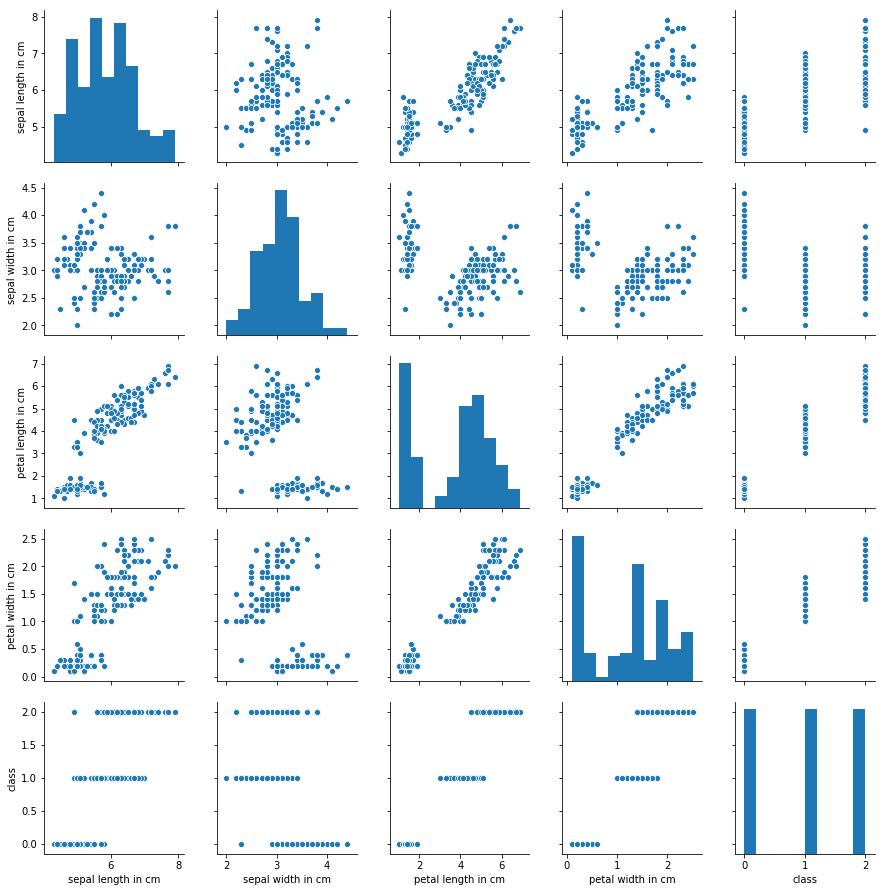

In [62]:
sns.pairplot(df)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [67]:
y = df[['class']]
x = df.drop('class',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [94]:
def KNeighborsClassifierModelAnalysis(k):
    NNH = KNeighborsClassifier(n_neighbors= k)
    # Call Nearest Neighbour algorithm
    NNH.fit(x_train, y_train)
    trainPreds=NNH.predict(x_train)
    testPreds=NNH.predict(x_test)
    #Get Train Data Accuracy
    trainAccuracy=accuracy_score(y_train,trainPreds)
   
     #Get Test Data Accuracy
    testAccuracy=accuracy_score(y_test,testPreds)
   
    resultsDf = pd.DataFrame( index=["K-Value", "Accuracy"])
    trainResults=[k, trainAccuracy]
    testResults=[k, testAccuracy]
    resultsDf['TrainResults'] = trainResults
    resultsDf['TestResults'] = testResults
    
    return resultsDf.round(2)

In [95]:
k_List=[3,5,9]

for k in k_List:
    resultDf=KNeighborsClassifierModelAnalysis(k)
    print("KNN Model Accuracy When K-Value is {0} :".format(k))
    print(resultDf)
    print()


KNN Model Accuracy When K-Value is 3 :
          TrainResults  TestResults
K-Value           3.00         3.00
Accuracy          0.97         0.97

KNN Model Accuracy When K-Value is 5 :
          TrainResults  TestResults
K-Value           5.00         5.00
Accuracy          0.96         0.97

KNN Model Accuracy When K-Value is 9 :
          TrainResults  TestResults
K-Value           9.00         9.00
Accuracy          0.98         0.97



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [91]:
# creating odd list of K for KNN (neighbors = 1,3,5,7,... 19)
neighbors = list(range(1,20,2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

cv_scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

[0.9573076923076924,
 0.9573076923076924,
 0.9496153846153847,
 0.9673076923076923,
 0.9756410256410255,
 0.9756410256410255,
 0.9756410256410255,
 0.9496153846153847,
 0.9496153846153847,
 0.9596153846153846]

In [92]:
# changing to misclassification error [MSE=1-CV_Scores]
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]

print("Lowest Misclassification Error is {0}.".format(min(MSE)))
print("The optimal number of neighbors is {0}.".format(optimal_k))

Lowest Misclassification Error is 0.024358974358974494.
The optimal number of neighbors is 9.


In [96]:
#Test accuracy with optimal value. Note, optimal value will get it from previous steps
resultDf=KNeighborsClassifierModelAnalysis(13)
print("KNN Model Accuracy When K-Value is {0}  (Optimal Value)".format(optimal_k))
print(resultDf)

# Looks K value 9 & 13 have same accuracy value

KNN Model Accuracy When K-Value is 9  (Optimal Value)
          TrainResults  TestResults
K-Value          13.00         13.0
Accuracy          0.97          1.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

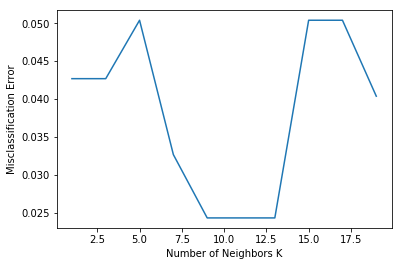

In [97]:
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# Naive Bayes with Iris Data

In [0]:
#Load all required library


### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [98]:
#Check the dataset
print(y)
print(x)

     class
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
..     ...
120      2
121      2
122      2
123      2
124      2
125      2
126      2
127      2
128      2
129      2
130      2
131      2
132      2
133      2
134      2
135      2
136      2
137      2
138      2
139      2
140      2
141      2
142      2
143      2
144      2
145      2
146      2
147      2
148      2
149      2

[150 rows x 1 columns]
     sepal length in cm  sepal width in cm  petal length in cm  \
0                   5.1                3.5                 1.4   
1                   4.9                3.0                 1.4   
2                   4.7                3.2                 1.3   
3                   4.6       

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

In [0]:
#Drop Id variable from data

### Question 12 
Find Correlation among all variables and give your insights 

In [0]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

[]

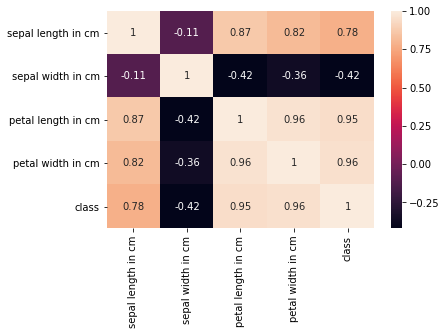

In [100]:
sns.heatmap(df.corr(),annot=True)
plt.plot()

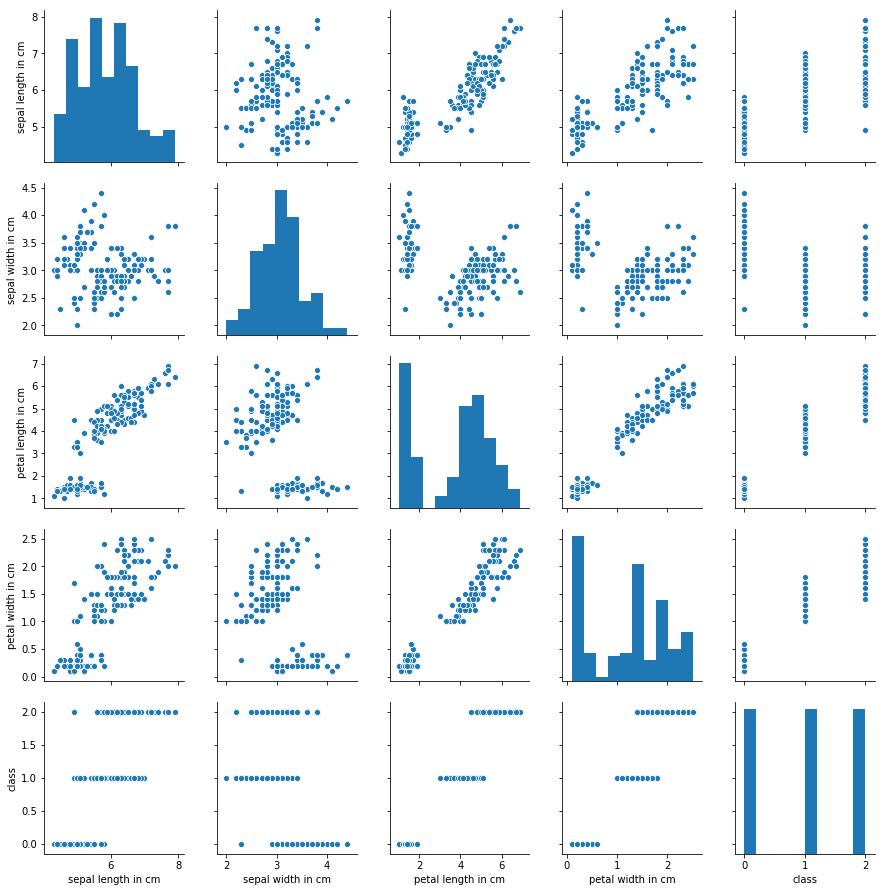

In [101]:
sns.pairplot(df)

### Split data in Training and test set in 80:20.

### Question 13 
Do Feature Scaling 

In [0]:
# Use StandardScaler or similar methods

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
# Standardize data (0 mean, 1 stdev)
scaler = StandardScaler().fit(x)
x = scaler.transform(x)

# Standardize data
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [105]:
test_size = 0.20 # taking 80:20 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

### Question 14 
Train and Fit NaiveBayes Model

In [107]:
#Fit the modelmodel = GaussianNB()
model.fit(x_train, y_train)
print(model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [108]:
#Predict
predicted = model.predict(x_test)

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [111]:
# show Confusion Matrix
metrics.confusion_matrix(predicted, y_test)

array([[ 7,  0,  0],
       [ 0, 11,  2],
       [ 0,  1,  9]], dtype=int64)

In [112]:
# show accuracy
print("Accuracy : {0}".format(accuracy_score(y_test,predicted)))

Accuracy : 0.9


In [113]:
#Show precision and Recall metrics
cr=metrics.classification_report(y_test,predicted)
print(cr)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.85      0.92      0.88        12
           2       0.90      0.82      0.86        11

   micro avg       0.90      0.90      0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



# For Practice  - Optional

All the questions from 16 to 20 are for practice.

# Using SVM with Diebetes Dataset

In [0]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 16 
Read the input file 'Diabetes.csv' using Pandas and check it's column names.

Check dimension of dataset.

Check distribution of dependent variable, Outcome and plot it.


In [0]:
# Eye ball the imported dataset

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [0]:
# Check data types and info of dataset

# Question 17 
Check data distribution using summary statistics and provide your findings.

Do correlation analysis and bivariate viualization with Insights


# Question 18 
Do train and test split. 
Optionally - You can do with stratify sampling(optional) on Outcome variable to maintain the distribution of dependent variable

# Question 19 
Train Support Vector Machine Model(1 Marks)

In [0]:
# use from sklearn.svm import SVC

In [0]:
# your insights

# Question 20
Scale the data points using MinMaxScaler

Fit SVM Model on Scale data and give your observation

#we can try increasing either C or gamma to fit a more complex model.

# Optional Question - 
Try improving the model accuracy using C=1000 (1 Marks)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [0]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [0]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [0]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [0]:
gs.fit(X_train_scaled, y_train) 

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [0]:
gs.best_estimator_

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
gs.best_score_ 

0.77777777777777779